#Q1 What is an ensemble classifier? Name some of the popular ensemble methods (at least three) and whichone you prefer and why? 

#ANS

Ensemble classifier is a method or technique in which multiple independent or similar or different model are combined to make an output or prediction,in ensemble classifier Random forest,Extra tree classifier/regressors, ensemble of linear regressors,ensemble of logistic regrression classifires ensemble of SVM and others classifier are included




The most popular technique is bagging and boosting and Weighted average
and I mostly prefer to use the weighted average because  the most important reason i used weighted average is that it mostly gives good and accurate prediction.


#Q2 Let’s assume we have a noisy dataset. You want to build a classifier model. Which classifier is appropriate for your dataset and why?

#ANS


If I have the noisy dataset then I will use the decison tree,because decison tree take out most important freature from the given dataset with the help of entropy and gini index

In [ ]:
import pandas as pd
from sklearn import preprocessing
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
import seaborn as sns

In [ ]:
dataset=pd.read_csv("/content/Customer relationship marketing (CRM).csv")
dataset.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV
4,Washington,2813.692575,No,Basic,Bachelor,2/03/2011,Employed,M,43836,Rural,Single,73,12,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car


In [ ]:
dataset.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,0.005354,0.009136,0.007563
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,-0.014241,-0.002354,1.000000


In [ ]:
LE=preprocessing.LabelEncoder()
dataset=dataset.drop(columns=['Effective To Date','State'])
dataset_1=dataset[['Response','Coverage','Education','EmploymentStatus','Gender','Location Code','Marital Status','Policy','Renew Offer Type','Sales Channel','Vehicle Class']]
dataset_1=dataset_1.apply(LE.fit_transform)
dataset=dataset.drop(columns=['Response','Coverage','Education','EmploymentStatus','Gender','Location Code','Marital Status','Policy','Renew Offer Type','Sales Channel','Vehicle Class'])
dataset=dataset.join(dataset_1)
dataset

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,Total Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class
0,2763.519279,56274,69,32,0,1,384.811147,0,0,0,1,0,1,1,2,0,0,5
1,6979.535903,0,94,13,0,8,1131.464935,0,1,0,4,0,1,2,5,2,0,0
2,12887.431650,48767,108,18,0,2,566.472247,0,2,0,1,0,1,1,5,0,0,5
3,7645.861827,0,106,18,0,7,529.881344,0,0,0,4,1,1,1,1,0,2,3
4,2813.692575,43836,73,12,0,1,138.130879,0,0,0,1,1,0,2,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,0,2,198.234764,0,0,0,1,1,2,1,3,1,3,0
9130,3096.511217,21604,79,14,0,1,379.200000,1,1,1,1,0,1,0,2,0,1,0
9131,8163.890428,0,85,9,3,2,790.784983,0,1,0,4,1,1,2,1,0,1,0
9132,7524.442436,21941,96,34,0,3,691.200000,0,1,1,1,1,1,1,4,2,1,0


In [ ]:
dataset.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,Total Claim Amount,State,Effective To Date,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,0.384388,2.966170,434.088794,1.741734,28.837749,0.143201,0.480622,1.554084,1.825706,0.490037,0.979089,1.120210,3.797788,0.970221,1.102693,1.892380
std,6870.967608,30379.904734,34.407967,10.073257,0.910384,2.390182,290.500092,1.287771,16.942769,0.350297,0.655817,1.381978,1.347793,0.499928,0.605732,0.636838,1.605978,1.007576,1.069452,2.072992
min,1898.007675,0.000000,61.000000,0.000000,0.000000,1.000000,0.099007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,0.000000,1.000000,272.258244,1.000000,14.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,0.000000,2.000000,383.945434,1.000000,28.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,1.000000,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,0.000000,4.000000,547.514839,3.000000,43.000000,0.000000,1.000000,3.000000,4.000000,1.000000,1.000000,2.000000,5.000000,2.000000,2.000000,4.000000
max,83325.381190,99981.000000,298.000000,35.000000,5.000000,9.000000,2893.239678,4.000000,58.000000,1.000000,2.000000,4.000000,4.000000,1.000000,2.000000,2.000000,8.000000,3.000000,3.000000,5.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer Lifetime Value    9134 non-null   float64
 1   Income                     9134 non-null   int64  
 2   Monthly Premium Auto       9134 non-null   int64  
 3   Months Since Last Claim    9134 non-null   int64  
 4   Number of Open Complaints  9134 non-null   int64  
 5   Number of Policies         9134 non-null   int64  
 6   Total Claim Amount         9134 non-null   float64
 7   Response                   9134 non-null   int64  
 8   Coverage                   9134 non-null   int64  
 9   Education                  9134 non-null   int64  
 10  EmploymentStatus           9134 non-null   int64  
 11  Gender                     9134 non-null   int64  
 12  Location Code              9134 non-null   int64  
 13  Marital Status             9134 non-null   int64

In [ ]:
#dataset=dataset.drop(columns=['State','Effective To Date'])
min_max_scale=preprocessing.MinMaxScaler()
x=dataset.values
x_scaled=min_max_scale.fit_transform(x)
x_scaled.shape

(9134, 18)

In [ ]:
column=['Customer Lifetime Value','Income','Monthly Premium Auto','Months Since Last Claim','Number of Open Complaints ','Number of Polices','Total Claim Amount','Response','Coverage','Education','EmploymentStatus','Gender','Location Code','Marital Status','Policy','Renew Offer Type','Sales Channel','Vehicle Class']
dataset=pd.DataFrame(x_scaled,columns=column)
dataset

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Polices,Total Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class
0,0.010629,0.562847,0.033755,0.914286,0.0,0.000,0.132974,0.0,0.0,0.00,0.25,0.0,0.5,0.5,0.250,0.000000,0.000000,1.0
1,0.062406,0.000000,0.139241,0.371429,0.0,0.875,0.391051,0.0,0.5,0.00,1.00,0.0,0.5,1.0,0.625,0.666667,0.000000,0.0
2,0.134960,0.487763,0.198312,0.514286,0.0,0.125,0.195764,0.0,1.0,0.00,0.25,0.0,0.5,0.5,0.625,0.000000,0.000000,1.0
3,0.070589,0.000000,0.189873,0.514286,0.0,0.750,0.183117,0.0,0.0,0.00,1.00,1.0,0.5,0.5,0.125,0.000000,0.666667,0.6
4,0.011245,0.438443,0.050633,0.342857,0.0,0.000,0.047710,0.0,0.0,0.00,0.25,1.0,0.0,1.0,0.375,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.0,0.125,0.068485,0.0,0.0,0.00,0.25,1.0,1.0,0.5,0.375,0.333333,1.000000,0.0
9130,0.014719,0.216081,0.075949,0.400000,0.0,0.000,0.131034,1.0,0.5,0.25,0.25,0.0,0.5,0.0,0.250,0.000000,0.333333,0.0
9131,0.076951,0.000000,0.101266,0.257143,0.6,0.125,0.273297,0.0,0.5,0.00,1.00,1.0,0.5,1.0,0.125,0.000000,0.333333,0.0
9132,0.069098,0.219452,0.147679,0.971429,0.0,0.250,0.238876,0.0,0.5,0.25,0.25,1.0,0.5,0.5,0.500,0.666667,0.333333,0.0


#Q3 Load and pre-process the dataset if necessary. Explain steps that you have taken. Are there any alternative ways for doing that? Explain. 

#ANS


----the dataset has the both values categorical and continoues for doing that I use the label encoder to change the values or you can seperate continous feature and categorical but catigorical has own importance in the dataset



----I normalize the dataset because  few features have the large values and some has the small values so I normalize the dataset ,standard scaler can also be use .




---Some columns drop which are playing the index role like 'State and Effective data'

#Q4 Analyse the importance of the features for predicting customer response using two different approaches. Explain the similarity/difference between outcomes. 

In [ ]:

# Sequential Forward Selection(sfs)
sfs = SFS(DecisionTreeClassifier(),
          k_features=19,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [ ]:
Y=dataset['Response']
X=dataset.drop(columns='Response')
print(X.shape[1])
print(Y)

17
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9129    0.0
9130    1.0
9131    0.0
9132    0.0
9133    0.0
Name: Response, Length: 9134, dtype: float64


In [ ]:
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 1.263074
Feature 1: 1.555930
Feature 2: 0.026270
Feature 3: 0.834814
Feature 4: 2.484091
Feature 5: 2.738963
Feature 6: 0.480383
Feature 7: 0.044003
Feature 8: 0.144803
Feature 9: 1.261832
Feature 10: 0.668088
Feature 11: 0.005617
Feature 12: 66.877461
Feature 13: 0.112885
Feature 14: 151.812599
Feature 15: 45.397316
Feature 16: 0.018918


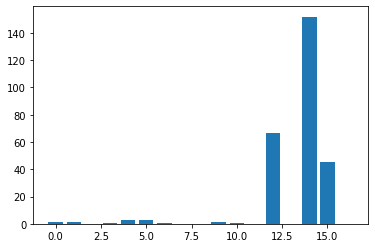

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
dataset.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Polices,Total Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,-0.036343,0.021955,0.226451,-0.008930,0.168040,0.026038,-0.034846,-0.013610,0.004854,-0.026003,0.015217,-0.068548,-0.003941,0.082307
Income,0.024366,1.000000,-0.016665,-0.026715,0.006408,-0.008656,-0.355254,0.011932,-0.010646,0.018709,-0.726741,-0.015138,-0.027517,-0.231673,0.005032,0.139856,0.013494,0.004343
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,-0.013122,-0.011233,0.632017,0.010966,0.458997,0.023952,0.006269,0.003918,0.002631,0.012423,-0.001258,-0.070285,-0.011738,0.169714
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,0.005354,0.009136,0.007563,-0.016597,0.016925,0.003021,0.008197,0.025522,-0.016733,0.007757,-0.013001,-0.016340,0.004432,-0.001708
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,1.000000,0.001498,-0.014241,-0.009881,-0.007971,-0.023270,0.007045,-0.003012,-0.002697,-0.000011,0.019019,-0.034073,-0.007485,-0.016370
Number of Polices,0.021955,-0.008656,-0.011233,0.009136,0.001498,1.000000,-0.002354,-0.020891,-0.013515,0.007266,0.005035,0.016258,0.003066,0.011664,-0.007944,-0.081073,0.013653,-0.005486
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,-0.014241,-0.002354,1.000000,0.016877,0.279078,0.020730,0.330465,0.074564,0.254766,0.204675,0.000858,-0.086558,-0.010055,0.097840
Response,-0.008930,0.011932,0.010966,-0.016597,-0.009881,-0.020891,0.016877,1.000000,0.000642,0.000285,-0.016703,0.004396,0.001729,-0.094843,-0.001461,-0.162882,-0.086607,0.021225
Coverage,0.168040,-0.010646,0.458997,0.016925,-0.007971,-0.013515,0.279078,0.000642,1.000000,0.021573,0.003239,-0.014448,-0.020176,0.002956,-0.002317,-0.049092,-0.024638,-0.017682
Education,0.026038,0.018709,0.023952,0.003021,-0.023270,0.007266,0.020730,0.000285,0.021573,1.000000,-0.025271,0.002206,-0.011533,0.005675,0.011119,0.067838,-0.005018,0.010192


#ANS



# for finding the relation ship between the fratures there are many methods but I use here ANOVA testing and corelation

#ANOVA testing use for finding the effect on dependet variable by independent variable,means set of variables are group together find the on dependent variable

#Corelaion is use to find the relation between the two vaiables.
#fail to find the thrid variable relation
#similaties

# so both technique are use to find the realationships between the attributes

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Customer relationship marketing (CRM).csv')
df


,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV
4,Washington,2813.692575,No,Basic,Bachelor,2/03/2011,Employed,M,43836,Rural,Single,73,12,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/2011,Employed,M,71941,Urban,Married,73,18,0,2,Personal L1,Offer2,Web,198.234764,Four-Door Car
9130,California,3096.511217,Yes,Extended,College,2/12/2011,Employed,F,21604,Suburban,Divorced,79,14,0,1,Corporate L3,Offer1,Branch,379.200000,Four-Door Car
9131,California,8163.890428,No,Extended,Bachelor,2/06/2011,Unemployed,M,0,Suburban,Single,85,9,3,2,Corporate L2,Offer1,Branch,790.784983,Four-Door Car
9132,California,7524.442436,No,Extended,College,2/03/2011,Employed,M,21941,Suburban,Married,96,34,0,3,Personal L2,Offer3,Branch,691.200000,Four-Door Car


# Q5

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
# print(df)
X = df[df.columns.drop('Response')]
Y = df[['Response']]
le = preprocessing.LabelEncoder()
for col in X:
  X[col] = le.fit_transform(X[col])
Y = le.fit_transform(Y)
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=1)
DT = DecisionTreeClassifier(criterion="entropy", max_depth=3)
mod = DT.fit(xtrain,ytrain)
LR = LinearRegression()
LR.fit(xtrain,ytrain)
NB = GaussianNB()
NB.fit(xtrain,ytrain)
pred = NB.predict(xtest)

NameError: ignored

**5a**
#Report performance score using a suitable metric. Is it possible that the presented result is an overfitted one? Justify. 


In [ ]:
print(accuracy_score(pred,ytest))

0.861729295877417


#ANS

Overfitting is possible in this case because training again again on the same data mey lead to variance in the results when compared to the actual results.

#5b Justify different design decisions for each ML model used to answer this question


#ANS
#--In this solution I use the three different models linear regression,decision tree and gaussianNB

#--Decision tree perform well and take out features which has large entropy value 


#--GassianNB perform on the basis of probability 


#--linear regression work well to find linear relationships between the vaiables and than make the prediction


#5C Have you optimised any hyper-parameters for each ML model? What are they? Why have you done that? Explain.


#ANS


#I optimised the decison tree hyper-parameters such as entropy and  max-depth because in this way  model will train well fast and tree will not have max depth

#5dFinally, make a recommendation based on the reported results and justify it.



#ANS



It is recommended that instead of using three different supervised learning algorithms to predict customer response, ensemble learning model can be used. this could reduce overfitting in the results.

# Q6

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

kfold = model_selection.KFold(n_splits=3, random_state=3)
DT = DecisionTreeClassifier()
n = 80
model = BaggingClassifier(base_estimator=DT, n_estimators=n, random_state=7)
result = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(result)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NameError: ignored

In [ ]:
seed = 3
n = 50
kfold = model_selection.KFold(n_splits=3, random_state=seed)
model = AdaBoostClassifier(n_estimators=n, random_state=seed)
result = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(result)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.872578   0.86863711 0.87352168]


In [ ]:
kfold = model_selection.KFold(n_splits=3, random_state=seed)
# create the sub models
estimator = []
LR = LogisticRegression()
estimator.append(('Logistic Regression', LR))
DT = DecisionTreeClassifier()
estimator.append(('Decision Tree', DT))
SV = SVC()
estimator.append(('SVM', SV))
# create the ensemble model
ensemble = VotingClassifier(estimator)
result = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(result)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

[0.85747126 0.85517241 0.85775296]


#When do you want to use ensemble models over other ML models?

#ANS

The main purpose to choose ensemble models over other ML models is because  it increases the accuracy of prediction on the given data where other models are unable to provide good accuracy.

#6b What are the similarities or differences between these models?


#LR vs DT
#Decision trees supports non linearity, where LR supports only linear solutions.


#When there are large number of features with less data-sets(with low noise), linear regressions may outperform Decision trees/random forests. In general cases, Decision trees will be having better average accuracy.


#For categorical independent variables, decision trees are better than linear regression.Decision trees handles colinearity better than LR.

#LR  vs SVM


#SVM supports both linear and non-linear solutions using kernel trick.


#SVM handles outliers better than LR.


#Both perform well when the training data is less, and there are large number of features.


#6C Is there any preferable scenario for using any specific model among set of ensemble models?

#ANS

#it can be possible,that we can use the specific model,other than ensemble models but now i dont have any senerio

#6dWrite a report comparing performances of models built in question 5 and 6. Report the best method based on model complexity and performance. 



ensemble learning is a technique where more then one model is train so it takes more computation and but it gives more accuracy but one model needs less compution as campare to ensemble learning but it is not possible that is gives maximum accuracy

#6e Is it possible to build ensemble model using ML classifiers other than decision tree? If yes, then explain with an example. 

#yes it is possible to build the ensemble model like KNN,SVM and navie bayes